In [1]:
#################################
# TRESC ZADANIA LABORATORYJNEGO #
#################################

# Prosze zaimportowac , dokonac wstepnej analizy i przygotowac do obróbki zni?r
# Wesbrook znajdujacy sie pod adresem http://jolej.linuxpl.info/Wesbrook.csv
# W tym celu nalezy:

# 1. Zaimportowac zbiór danych z odpowiednimi typami zmiennych z uzyciem funkcji read_csv()
# 2. Dokonac wstepnej analizy zbioru z wykorzystaniem statystyk opisowych
# 3. Dokonac analizy istotnosci zmiennych , utworzyc nowy zbi?r Wesbrook2 zawierajacy tylko 
# istotne zmienne.
# 4. Wykonac wizualna analize danych, w ramach analizy wizualnej rozklad zmiennych numerycznych 
# przedstawic na jednym wykresie macierzowym uzywajac histogram?w
# 5. Przygotowac dane do analizy w tym celu:
#  - dokonac imputacji brakujacych wartosci
#  - normalizacji zmiennych numerycznych metoda z-score i min-max
#  - wykonac kodowanie zero jedynkowe (wprowadzic zmienne sztuczne) dla zmiennej MARTIAL
#  - wykonac probkowanie warstwowe dzielac zbior na treningowy i walidacyjny w proporcji 
#  80 % do 20% wedlug zmiennej WESBROOK

In [2]:
#######################################
#######################################
# ROZWIAZANIE ZADANIA LABORATORYJNEGO #
#######################################
#######################################

In [3]:
# Instalacja bilbiotek

if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}

if (!requireNamespace("GGally", quietly = TRUE)) {
    install.packages("GGally")
}

if (!requireNamespace("caTools", quietly = TRUE)) {
    install.packages("caTools")
}


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [4]:
# Zimportowanie bibliotek
library(tidyverse)
library(GGally)
library(caTools)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
#############################################################################################
# 1. Zaimportować zbior danych z odpowiednimi typami zmiennych z uzyciem funkcji read_csv() #
#############################################################################################

In [6]:
# Zaimportowanie zbioru danych z podaniem typów kolumn do zmiennej srodowiskowej "Wesbrook"
Wesbrook <- read_csv('http://jolej.linuxpl.info/Wesbrook.csv', col_types = "ifncfffffffffcffffinnnnnnnfnnnn")

In [7]:
# Wyswietlenie podgladu danych przechowywanych w obiekcie "Wesbrook"
glimpse(Wesbrook)

Rows: 2,770
Columns: 31
$ ID       <int> 88, 152, 157, 158, 159, 160, 169, 206, 209, 218, 231, 238, 27…
$ WESBROOK <fct> Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, Y, N, Y, Y, N, Y, N, N, N, Y…
$ TOTLGIVE <dbl> 24728, 23500, 3000, 7600, 20000, 7829, 2476, 5000, 13611, 685…
$ INDUPDT  <chr> "10/02/1995", "07/21/1997", "08/22/1994", "12/21/1996", "05/0…
$ GRADYR1  <fct> 1960, 1988, 1949, NA, 1958, NA, NA, 1993, 1937, 1990, 1958, N…
$ FACULTY1 <fct> CO, PO, AP, NA, LA, NA, NA, PO, AR, PO, CO, NA, AP, LA, LA, F…
$ DEPT1    <fct> CO, PO, AP, NA, LA, NA, NA, PO, AR, PO, CO, NA, AP, LA, LA, F…
$ MAJOR1   <fct> NA, NA, CIVL, NA, NA, NA, NA, NA, NA, NA, NA, NA, GEOE, NA, N…
$ PARENT   <fct> Y, N, Y, N, Y, Y, N, Y, Y, Y, Y, Y, N, N, N, N, N, N, N, N, N…
$ CHILD    <fct> Y, N, N, N, Y, N, N, Y, Y, N, N, N, N, N, N, N, N, N, N, N, N…
$ SPOUSE   <fct> Y, Y, Y, Y, Y, N, Y, Y, Y, Y, Y, Y, N, N, Y, Y, N, Y, Y, N, Y…
$ SEX      <fct> M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, F, F, M…
$ MARITAL  <fct>

In [8]:
###########################################################################
# 2. Dokonac wstepnej analizy zbioru z wykorzystaniem statystyk opisowych #
###########################################################################

In [9]:
# Wyswietlenie statystyk opisowych dla poszczegolnych zmiennych
summary(Wesbrook)
# Dane sa zroznicowane, wartosci dla zmiennych kategorii sa zroznicowane, a
# dla zmiennych numerycznych patrzac na ich parametry
# min, max, srednia oraz mediane rowniez szeroki zakres wartosci

       ID         WESBROOK    TOTLGIVE        INDUPDT             GRADYR1    
 Min.   :    88   Y:1385   Min.   :     1   Length:2770        1995   :  55  
 1st Qu.: 56836   N:1385   1st Qu.:   120   Class :character   1977   :  48  
 Median :107387            Median :  1000   Mode  :character   1993   :  46  
 Mean   :112929            Mean   :  3328                      1979   :  44  
 3rd Qu.:181532            3rd Qu.:  4234                      1994   :  44  
 Max.   :220512            Max.   :310150                      (Other):1586  
                                                               NA's   : 947  
    FACULTY1       DEPT1         MAJOR1     PARENT   CHILD    SPOUSE   SEX     
 GR     :357   AR     :400   CIVL   :  49   Y: 284   Y:  79   Y:1037   M:1689  
 AR     :308   LA     :229   ENGL   :  40   N:2486   N:2691   N:1733   F:1081  
 LA     :225   CO     :223   ELEC   :  37                                      
 AP     :181   AP     :175   MECH   :  32               

In [10]:
# Wyswietlenie wszystkich wartosci zmiennej czynnikowej "CHILD"
# Sa tylko 2 wartości: "Y" oraz "N"
table(select(Wesbrook, CHILD))

CHILD
   Y    N 
  79 2691 

In [11]:
# Wyswietlenie udzialu procentowego zmiennej czynnikowej "CHILD"
prop.table(table(select(Wesbrook, CHILD)))

CHILD
         Y          N 
0.02851986 0.97148014 

In [12]:
# Wyswietlenie wszystkich wartosci zmiennej czynnikowej "EA"
# Występuje zazwyczaj raz, czasami się powtarza
table(select(Wesbrook, EA))

EA
10005065 10006553 10006604 10006653 12001205 12006054 12007252 12008011 
       1        1        1        1        1        1        1        1 
12008211 13003059 13003455 13003456 13007059 24013153 24014417 24025057 
       1        1        1        1        1        1        1        1 
24029117 24032004 24041164 24041307 24047015 24047118 24047201 24047251 
       1        1        1        1        1        1        1        1 
24047409 24049160 24051268 24061161 24061163 24061569 24061619 24061651 
       1        1        1        1        1        1        1        1 
24062164 24065362 35002058 35002118 35003061 35005118 35006059 35006060 
       1        1        1        1        1        1        1        1 
35006109 35007262 35007301 35010102 35010113 35010156 35010209 35010261 
       1        1        1        2        1        1        1        1 
35010264 35010355 35013017 35013266 35014154 35014202 35015113 35015316 
       1        1        1        1        1    

In [13]:
# Wyswietlenie udzialu procentowego zmiennej czynnikowej "EA"
prop.table(table(select(Wesbrook, EA)))

EA
    10005065     10006553     10006604     10006653     12001205     12006054 
0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 
    12007252     12008011     12008211     13003059     13003455     13003456 
0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 
    13007059     24013153     24014417     24025057     24029117     24032004 
0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 
    24041164     24041307     24047015     24047118     24047201     24047251 
0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 
    24047409     24049160     24051268     24061161     24061163     24061569 
0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 
    24061619     24061651     24062164     24065362     35002058     35002118 
0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 0.0003627131 
    35003061     35005118     35006059     350060

In [14]:
# Sumuje sie do 1 (100%)
sum(prop.table(table(select(Wesbrook, EA))))

[1] 1

In [15]:
# Wyswietlenie statystyk dla zmiennej czynnikowej  "MARITAL"
# Jest ich 955 (cases in table) i odnosi się do 1 zmiennej (factors) - "MARITAL" 
Wesbrook %>%
  select(MARITAL) %>%
  table() %>%
  summary()

Number of cases in table: 955 
Number of factors: 1 

In [16]:
# Wyswietlenie statystyk dla zmiennej czynnikowej  "MARITAL", ale tylko
# dla wierszy, ktore mają wartość "CHILD" ustawiona na "Y"
# Jest ich 46 (cases in table) i odnosi się do 1 zmiennej (factors) - "MARITAL" 
Wesbrook %>%
  filter(CHILD == "Y") %>%
  select(MARITAL) %>%
  table() %>%
  summary()

Number of cases in table: 46 
Number of factors: 1 

In [17]:
# Wyswietlenie wszystkich wartosci zmiennej czynnikowej "MARITAL"
Wesbrook %>%
  select(MARITAL) %>%
  table()

MARITAL
  M   W   S   D   G 
789  72  87   5   2 

In [18]:
# Wyswietlenie wszystkich wartosci zmiennej czynnikowej "MARITAL", ale tylko
# dla wierszy, ktore mają wartość "CHILD" ustawiona na "Y"
Wesbrook %>%
  filter(CHILD == "Y") %>%
  select(MARITAL) %>%
  table()

MARITAL
 M  W  S  D  G 
37  3  6  0  0 

In [19]:
# Wyswietlenie udzialu procentowego zmiennej czynnikowej "MARITAL", ale tylko
# dla wierszy, ktore mają wartość "CHILD" ustawiona na "Y"
Wesbrook %>%
  filter(CHILD == "Y") %>%
  select(MARITAL) %>%
  table() %>%
  prop.table()

MARITAL
         M          W          S          D          G 
0.80434783 0.06521739 0.13043478 0.00000000 0.00000000 

In [20]:
# Wyswietlenie srednich dochodow dla regionow majacy kod zaczynajacy sie od "59"
Wesbrook %>%
  filter(startsWith(as.character(EA), "59")) %>%
  summarise(avg_income = mean(AVE_INC, na.rm = TRUE))

avg_income
<dbl>
77613.92


In [21]:
#############################################################################################
# 3. Dokonac analizy istotnosci zmiennych , utworzyc nowy zbior Wesbrook2 zawierajacy tylko #
# istotne zmienne.                                                                          #
#############################################################################################

In [22]:
# Lista nieistotnych zmiennych:
# 1. ID - sluzy tylko do identyfikacji wierszy
# 2. BIGBLOCK - posiada same wartosci "N", zaden nie bierze udziału w programie BIGBLOCK
# 3. MAJOR1 - znaczna wiekszosc wierszy nie ma przypisanej wartosci
# 4. MOV_DWEL - prawie wszystkie wartosci sa bliskie zeru

In [23]:
# Stworzenie nowego zbioru Wesbrook2 pomijajacy nieistotne zmienne ze zbioru Wesbrook
Wesbrook2 <- select(Wesbrook, -ID, -MAJOR1, -MOV_DWEL)

In [24]:
#################################################################################################
# 4. Wykonac wizualna analize danych, w ramach analizy wizualnej rozklad zmiennych numerycznych #
# przedstawic na jednym wykresie macierzowym uzywajac histogramow                               #
#################################################################################################

In [25]:
# Filtracja i wybranie tylko zmiennych numerycznych z zbioru Wesbrook2
Wesbrook2_numeric <- Wesbrook2 %>% select_if(is.numeric)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 947 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 28 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 28 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 28 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 28 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 71 rows containing 

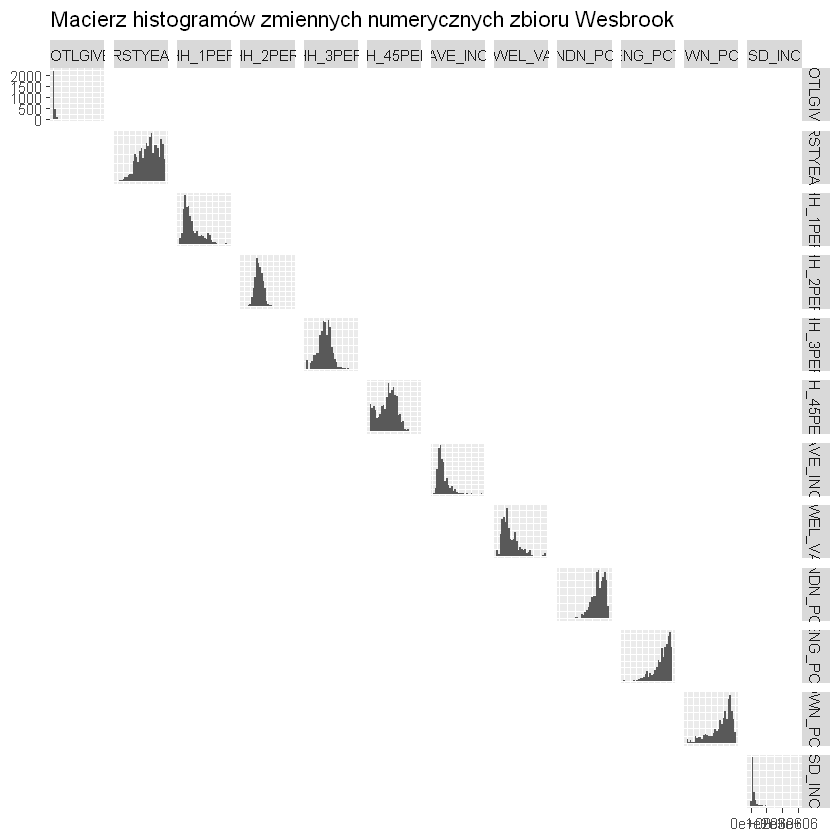

In [26]:
# Tworzenie z wykorzystaniem biblioteki GGally wykresu macierzowego z histogramami dla każdej zmiennej numerycznej
ggpairs(Wesbrook2_numeric, 
        diag = list(continuous = "barDiag"),
        lower = list(continuous = "blank"),
        upper = list(continuous = "blank"),
        title = "Macierz histogramów zmiennych numerycznych zbioru Wesbrook")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1314 rows containing non-finite outside the scale range (`stat_bin()`)."


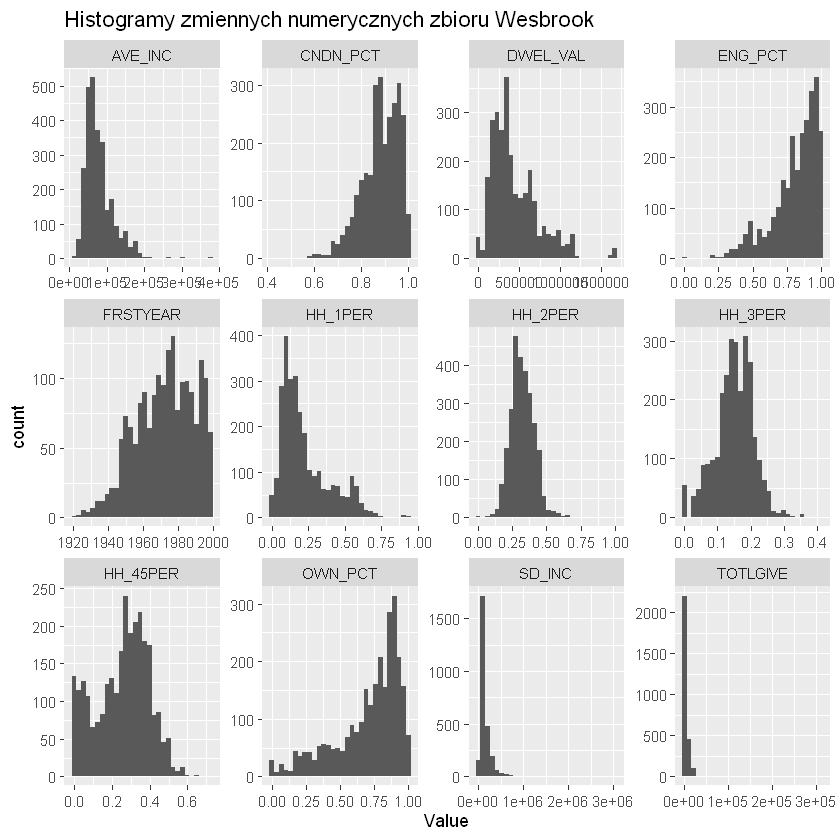

In [27]:
# Tworzenie histogramów z uzyciem facet_wrap do wyswitlenia ich na calym widoku
ggplot(
  Wesbrook2_numeric %>%
    pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value"),
  aes(x = Value)
  ) +
  labs(title = "Histogramy zmiennych numerycznych zbioru Wesbrook") +
  geom_histogram() +
  facet_wrap(~ Variable, scales = "free")

In [28]:
##########################################################################################
# 5. Przygotowac dane do analizy w tym celu:                                             #
#  - dokonac imputacji brakujacych wartosci                                              #
#  - normalizacji zmiennych numerycznych metoda z-score i min-max                        #
#  - wykonac kodowanie zero jedynkowe (wprowadzic zmienne sztuczne) dla zmiennej MARTIAL #
#  - wykonac probkowanie warstwowe dzielac zbior na treningowy i walidacyjny w proporcji #
#  80 % do 20% wedlug zmiennej WESBROOK                                                  #
##########################################################################################

In [29]:
# tworzenie kopii zbioru wesbrook
Wesbrook_prepare <- Wesbrook

In [30]:
#  - dokonac imputacji brakujacych wartosci

In [31]:
# sprawdzenie liczby brakujacych wartosci dla zbioru Wesbrook
colSums(is.na(Wesbrook))

ID WESBROOK TOTLGIVE  INDUPDT  GRADYR1 FACULTY1    DEPT1   MAJOR1 
       0        0        0       12      947      947      947     1964 
  PARENT    CHILD   SPOUSE      SEX  MARITAL       EA FACSTAFF  ATHLTCS 
       0        0        0        0     1815       13        0        0 
BIGBLOCK OTHERACT FRSTYEAR MOV_DWEL  HH_1PER  HH_2PER  HH_3PER HH_45PER 
       0        0      947       28       28       28       28       28 
 AVE_INC DWEL_VAL     PROV CNDN_PCT  ENG_PCT  OWN_PCT   SD_INC 
      71       28       17       29       28       28       71

In [32]:
# Wykonanie imputacji dla zmiennej numerycznej "FRSTYEAR" za pomocą mediany
# mutate(FRSTYEAR, (...)) -> dokonaj imputacji dla zmiennej "FRSTYEAR"
# ~ifelse(is.na(.), (...), .) -> jesli jest pusty (is.na(.)) to przypisz mu wartosc, jesli nie to pozostaw taka jaka jest
# mean(., na.rm = TRUE) -> obliczanie sredniej arytmetycznej (mean) dla niepustych (na.rm = TRUE) wartosci
Wesbrook_prepare <- Wesbrook_prepare %>%
  mutate(FRSTYEAR = ifelse(is.na(FRSTYEAR), median(FRSTYEAR, na.rm = TRUE), FRSTYEAR))

In [33]:
# Wykonanie imputacji dla pozostalych zmiennych numerycznych za pomocą sredniej arytmetycznej
# mutate_if(is.numeric, (...)) -> dokonaj imputacji jesli zmienna ma wartosc numeryczna (is.numeric)
# ~ifelse(is.na(.), (...), .) -> jesli jest pusty (is.na(.)) to przypisz mu wartosc, jesli nie to pozostaw taka jaka jest
# mean(., na.rm = TRUE) -> obliczanie sredniej arytmetycznej (mean) dla niepustych (na.rm = TRUE) wartosci
Wesbrook_prepare <- Wesbrook_prepare %>%
  mutate_if(is.numeric, ~ifelse(is.na(.), mean(., na.rm = TRUE), .))

In [34]:
# Wykonanie imputacji dla zmiennych kategorii za pomocą najczesciej wystepujacej wartosci
# mutate_if(is.factor, (...)) -> dokonaj imputacji jesli zmienna jest zmienna kategorii (is.factor)
# ~ifelse(is.na(.), (...), .) -> jesli jest pusty (is.na(.)) to przypisz mu wartosc, jesli nie to pozostaw taka jaka jest
# names(...) -> wyznaczenie nazwy kategorii o największej liczbie wystąpień
# which.max(...) -> wyznaczenie indeksu najczęściej występującej wartości w tej tabeli.
# table(.) -> utworzenie tabeli częstości, zliczającej liczbę wystąpień każdej kategorii w danej kolumnie.
# as.character() -> konwersja indeksu najwczesciej wystepujacej zmiennej do postaci znakowej, aby moc ja przypisac
Wesbrook_prepare <- Wesbrook_prepare %>%
  mutate_if(is.factor, ~ifelse(is.na(.), as.character(names(which.max(table(.)))), as.character(.)))

In [35]:
# Wykonanie imputacji dla zmiennej "INDUPDT" wstawiajac w jej miejsce dzisiejsza date
Wesbrook_prepare <- Wesbrook_prepare %>%
  mutate(INDUPDT = ifelse(is.na(INDUPDT), Sys.Date(), INDUPDT))

In [36]:
# Wykonanie imputacji dla zmiennej "EA" wstawiajac region domyslny "12345678"
Wesbrook_prepare <- Wesbrook_prepare %>%
  mutate(EA = ifelse(is.na(EA), "12345678", EA))

In [37]:
# sprawdzenie liczby brakujacych wartosci po ich ich wypelnieniu, kazda kolumna powinna miec 0 brakujacych wartosci
colSums(is.na(Wesbrook_prepare))

ID WESBROOK TOTLGIVE  INDUPDT  GRADYR1 FACULTY1    DEPT1   MAJOR1 
       0        0        0        0        0        0        0        0 
  PARENT    CHILD   SPOUSE      SEX  MARITAL       EA FACSTAFF  ATHLTCS 
       0        0        0        0        0        0        0        0 
BIGBLOCK OTHERACT FRSTYEAR MOV_DWEL  HH_1PER  HH_2PER  HH_3PER HH_45PER 
       0        0        0        0        0        0        0        0 
 AVE_INC DWEL_VAL     PROV CNDN_PCT  ENG_PCT  OWN_PCT   SD_INC 
       0        0        0        0        0        0        0

In [38]:
#  - normalizacji zmiennych numerycznych metoda z-score i min-max

In [39]:
# Standaryzacja (z-score) zmiennej numerycznej "AVE_INC"
# oblicza srednia oraz odchylenie standardowe, a nastepnie wstawia wynik tej
# operacji: wartosc_znormalizowana = (wartosc - srednia) / odchylenie
Wesbrook_prepare <- Wesbrook_prepare %>%
  mutate(AVE_INC = (AVE_INC - mean(AVE_INC)) / sd(AVE_INC))

In [40]:
# Skalowanie min-max zmiennej numerycznej "TOTLGIVE"
# oblicza wartosc minimalna oraz maksymalna, a nastepnie wstawia wynik tej
# operacji: wartosc_znormalizowana = (wartosc - min) / (max - min)
Wesbrook_prepare <- Wesbrook_prepare %>%
  mutate(TOTLGIVE = (TOTLGIVE - min(TOTLGIVE)) / (max(TOTLGIVE) - min(TOTLGIVE)))

In [41]:
#  - wykonac kodowanie zero jedynkowe (wprowadzic zmienne sztuczne) dla zmiennej MARTIAL
# "one-hot encoding"

In [42]:
# Tworzenie matrycy ze zmiennymi logicznymi dla kazdej wartosci zmiennej "MARITAL"
# model.matrix -> utworzenie macierzy projektowej z zadanej formuły
# ~ MARITAL -> tworzenie macierzy na podstawie zmiennej "MARITAL"
# - 1 -> zadna kolumna nie bedzie traktowana jako odniesienie, dzieki czemu kazda wartosc bedzie miala osobna kolumne
# data = Wesbrook_prepare -> wskazanie na zrodlo danych do utworzenia kolumn
marital_vars <- model.matrix(~ MARITAL - 1, data = Wesbrook_prepare)

In [43]:
# Zmiana nazw kolumn z formatu zmiennawartosc na zmienna_wartosc
# colnames -> pobranie biezacych nazw kolumn
# paste(..., ..., sep = "_") - laczy lancuchy znakow wstawiajac miedzy nimi znaki z argumentu "sep"
# sub("MARITAL", "", colnames(marital_vars)) -> usuwa tekst "MARITAL" z nazwy kolumny
colnames(marital_vars) <- paste("MARITAL", sub("MARITAL", "", colnames(marital_vars)), sep = "_")

In [44]:
# Dodanie kolumn do zbioru
# cbind -> laczy zbiory kolumnowo tak, ze Wesbrook_prepare otrzyma wartosci logiczne w ramach kolumn od marital_vars 
Wesbrook_prepare <- cbind(Wesbrook_prepare, marital_vars)

In [45]:
# * Wersja alternatywna (prostrza), reczne dodanie kolumny dla kazdej wartosci po poprzednim sprawdzeniu jakie wystepuja
# table(select(Wesbrook, MARITAL))  #   M   W   S   D   G 
# Wesbrook_prepare <- Wesbrook_prepare %>%
#   mutate(
#     MARITAL_D = if_else(MARITAL == "D", 1, 0),
#     MARITAL_G = if_else(MARITAL == "G", 1, 0),
#     MARITAL_M = if_else(MARITAL == "M", 1, 0),
#     MARITAL_S = if_else(MARITAL == "S", 1, 0),
#     MARITAL_W = if_else(MARITAL == "W", 1, 0)
#   )

In [46]:
#  - wykonac probkowanie warstwowe dzielac zbior na treningowy i walidacyjny w proporcji
#  80 % do 20% wedlug zmiennej WESBROOK

In [47]:
# Ustalanie ziarna dla powtarzalnosci wynikow
set.seed(1234) 

In [48]:
# Tworzenie zbioru treningowego (80%)
# sample.split -> podział danych przy zachowaniu proporcji klas
# Wesbrook_prepare$WESBROOK -> zbior danych do podzialu warstwowego
# SplitRatio = 0.8 -> proporcja podzialu (80%)
sample_set <- sample.split(Wesbrook2$WESBROOK, SplitRatio = 0.8)

In [49]:
# Tworzenie zbioru treningowego na podstawie zebranej listy indeksow
Wesbrook_train <- subset(Wesbrook2, sample_set == TRUE)

In [50]:
# Tworzenie zbioru walidacyjnego na podstawie dopelnienia zbioru treningowego
Wesbrook_validation <- subset(Wesbrook2, sample_set == FALSE)

In [51]:
##################
# KONIEC ZADANIA #
##################